<a href="https://colab.research.google.com/github/Thato-Th/Portfolio-Optimization/blob/main/Optimising_the_Prudential_Equity_Fund_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program attempts to maximise the top 10 holdings of the Prudential Equity Fund, using the efficient frontier.
#Top 10 as per fund factsheet can be found: https://www.prudential.co.za/media/29463/prudential-equity-fund.pdf

In [ ]:
#Import the relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock symbols/tickers
assets = ['NPN.JO', 'AGL.JO', 'BTI.JO', 'SBK.JO', 'MTN.JO', 'ABG.JO', 'NHM.JO', 'EXX.JO', 'SSL']

In [ ]:
#Weights
weights = np.array([0.29, 0.13, 0.11, 0.1, 0.1, 0.08, 0.07, 0.07, 0.06])

In [ ]:
#Get the portfolio start date
start_date = '2016-05-23'

In [ ]:
#Get the portfolio end date(today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-05-21'

In [ ]:
#Create a dataframe to store the adjusted close prices of the stocks
df = pd.DataFrame()

#Store the adjusted close prices in the df

for stock in assets:
  df[stock] = web.DataReader(stock, data_source = 'yahoo', start = start_date, end = today)['Adj Close']

df

,NPN.JO,AGL.JO,BTI.JO,SBK.JO,MTN.JO,ABG.JO,NHM.JO,EXX.JO,SSL
Date,,,,,,,,,
2016-05-23,131485.921875,11443.400391,82458.710938,9243.771484,9799.000977,10474.609375,4671,3834.809326,26.382055
2016-05-24,135222.562500,11677.813477,83690.976562,9386.019531,9847.431641,10617.600586,4514,3757.177002,26.644876
2016-05-25,136502.796875,11919.787109,84685.765625,9505.073242,9955.054688,10760.594727,4460,3843.370850,27.714296
2016-05-26,136193.265625,12090.346680,83788.617188,9703.756836,9702.140625,11084.170898,4550,3859.354492,27.841175
2016-05-27,140526.656250,11820.645508,84487.867188,9660.464844,9673.698242,10784.181641,4330,3781.722412,27.714296
...,...,...,...,...,...,...,...,...,...
2021-05-17,306650.000000,65740.000000,56147.000000,12115.000000,9652.000000,12443.000000,24006,16197.000000,16.870001
2021-05-18,301426.000000,65861.000000,55816.000000,12236.000000,9555.000000,12630.000000,24249,16082.000000,16.530001
2021-05-19,298375.000000,62087.000000,54996.000000,12081.000000,9611.000000,12556.000000,23258,15548.000000,16.059999


In [ ]:
df.isnull().sum()

NPN.JO     0
AGL.JO     0
BTI.JO     0
SBK.JO     0
MTN.JO     0
ABG.JO     0
NHM.JO     0
EXX.JO     0
SSL       34
dtype: int64

In [ ]:
#SSL is listed in USD and will have to be amended to ZAR 
# Get historical forex 
curr = web.DataReader("ZAR=X", 'yahoo', start = '2016-05-24', end= today)['Adj Close']
curr

Date
2016-05-23    15.72025
2016-05-24    15.65008
2016-05-25    15.65247
2016-05-26    15.51768
2016-05-29    15.70210
                ...   
2021-05-16    14.12544
2021-05-17    14.09261
2021-05-18    14.00752
2021-05-19    14.10130
2021-05-21    13.94910
Name: Adj Close, Length: 1281, dtype: float64

In [ ]:
#Append SSL to curr
curr_new = pd.concat([curr, df['SSL']], axis = 1)
curr_new


,Adj Close,SSL
Date,,
2016-05-23,15.72025,26.382055
2016-05-24,15.65008,26.644876
2016-05-25,15.65247,27.714296
2016-05-26,15.51768,27.841175
2016-05-27,NaN,27.714296
...,...,...
2021-05-17,14.09261,16.870001
2021-05-18,14.00752,16.530001
2021-05-19,14.10130,16.059999


In [ ]:
#drop the USD denominated SSL and replace it with the ZAR demoninated SSL in the df

df['SSL ZAR'] = curr_new['Adj Close']*df['SSL']
df


,NPN.JO,AGL.JO,BTI.JO,SBK.JO,MTN.JO,ABG.JO,NHM.JO,EXX.JO,SSL,SSL ZAR
Date,,,,,,,,,,
2016-05-23,131485.921875,11443.400391,82458.710938,9243.771484,9799.000977,10474.609375,4671,3834.809326,26.382055,414.732508
2016-05-24,135222.562500,11677.813477,83690.976562,9386.019531,9847.431641,10617.600586,4514,3757.177002,26.644876,416.994441
2016-05-25,136502.796875,11919.787109,84685.765625,9505.073242,9955.054688,10760.594727,4460,3843.370850,27.714296,433.797182
2016-05-26,136193.265625,12090.346680,83788.617188,9703.756836,9702.140625,11084.170898,4550,3859.354492,27.841175,432.030450
2016-05-27,140526.656250,11820.645508,84487.867188,9660.464844,9673.698242,10784.181641,4330,3781.722412,27.714296,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-17,306650.000000,65740.000000,56147.000000,12115.000000,9652.000000,12443.000000,24006,16197.000000,16.870001,237.742349
2021-05-18,301426.000000,65861.000000,55816.000000,12236.000000,9555.000000,12630.000000,24249,16082.000000,16.530001,231.544311
2021-05-19,298375.000000,62087.000000,54996.000000,12081.000000,9611.000000,12556.000000,23258,15548.000000,16.059999,226.466874


In [ ]:
#Drop the dollar denominated SSL

df_final = df.drop(['SSL'], axis = 1)
df_final

,NPN.JO,AGL.JO,BTI.JO,SBK.JO,MTN.JO,ABG.JO,NHM.JO,EXX.JO,SSL ZAR
Date,,,,,,,,,
2016-05-23,131485.921875,11443.400391,82458.710938,9243.771484,9799.000977,10474.609375,4671,3834.809326,414.732508
2016-05-24,135222.562500,11677.813477,83690.976562,9386.019531,9847.431641,10617.600586,4514,3757.177002,416.994441
2016-05-25,136502.796875,11919.787109,84685.765625,9505.073242,9955.054688,10760.594727,4460,3843.370850,433.797182
2016-05-26,136193.265625,12090.346680,83788.617188,9703.756836,9702.140625,11084.170898,4550,3859.354492,432.030450
2016-05-27,140526.656250,11820.645508,84487.867188,9660.464844,9673.698242,10784.181641,4330,3781.722412,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-17,306650.000000,65740.000000,56147.000000,12115.000000,9652.000000,12443.000000,24006,16197.000000,237.742349
2021-05-18,301426.000000,65861.000000,55816.000000,12236.000000,9555.000000,12630.000000,24249,16082.000000,231.544311
2021-05-19,298375.000000,62087.000000,54996.000000,12081.000000,9611.000000,12556.000000,23258,15548.000000,226.466874


In [ ]:
df_final.isnull().sum()

NPN.JO       0
AGL.JO       0
BTI.JO       0
SBK.JO       0
MTN.JO       0
ABG.JO       0
NHM.JO       0
EXX.JO       0
SSL ZAR    196
dtype: int64

In [ ]:
#Dropping the missing values
df_final.dropna(axis = 0)

,NPN.JO,AGL.JO,BTI.JO,SBK.JO,MTN.JO,ABG.JO,NHM.JO,EXX.JO,SSL ZAR
Date,,,,,,,,,
2016-05-23,131485.921875,11443.400391,82458.710938,9243.771484,9799.000977,10474.609375,4671,3834.809326,414.732508
2016-05-24,135222.562500,11677.813477,83690.976562,9386.019531,9847.431641,10617.600586,4514,3757.177002,416.994441
2016-05-25,136502.796875,11919.787109,84685.765625,9505.073242,9955.054688,10760.594727,4460,3843.370850,433.797182
2016-05-26,136193.265625,12090.346680,83788.617188,9703.756836,9702.140625,11084.170898,4550,3859.354492,432.030450
2016-05-31,143100.109375,11736.625977,85309.382812,9587.020508,9416.943359,10757.646484,4110,3571.087402,430.169036
...,...,...,...,...,...,...,...,...,...
2021-05-13,302055.000000,64961.000000,55766.000000,11995.000000,9605.000000,12250.000000,23514,15840.000000,232.992313
2021-05-17,306650.000000,65740.000000,56147.000000,12115.000000,9652.000000,12443.000000,24006,16197.000000,237.742349
2021-05-18,301426.000000,65861.000000,55816.000000,12236.000000,9555.000000,12630.000000,24249,16082.000000,231.544311


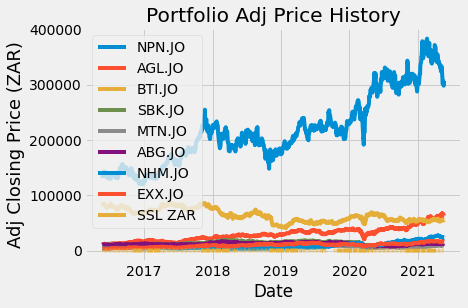

In [ ]:
#Visually show the portfolio

plt.title ('Portfolio Adj Price History')

#Create and plot the graph
for c in df_final.columns.values:
  plt.plot(df_final[c], label = c)

plt.xlabel('Date')
plt.ylabel('Adj Closing Price (ZAR)', fontsize =18)
plt.legend(df_final.columns.values, loc = 'upper left')
plt.show()


In [ ]:
#Show the daily simple returns
returns = df_final.pct_change()
returns

,NPN.JO,AGL.JO,BTI.JO,SBK.JO,MTN.JO,ABG.JO,NHM.JO,EXX.JO,SSL ZAR
Date,,,,,,,,,
2016-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-24,0.028419,0.020485,0.014944,0.015389,0.004942,0.013651,-0.033612,-0.020244,0.005454
2016-05-25,0.009468,0.020721,0.011886,0.012684,0.010929,0.013468,-0.011963,0.022941,0.040295
2016-05-26,-0.002268,0.014309,-0.010594,0.020903,-0.025406,0.030070,0.020179,0.004159,-0.004073
2016-05-27,0.031818,-0.022307,0.008345,-0.004461,-0.002932,-0.027065,-0.048352,-0.020115,0.000000
...,...,...,...,...,...,...,...,...,...
2021-05-17,0.016616,0.016184,-0.003744,-0.007455,0.004893,-0.002165,0.014152,0.001236,0.020387
2021-05-18,-0.017036,0.001841,-0.005895,0.009988,-0.010050,0.015029,0.010122,-0.007100,-0.026070
2021-05-19,-0.010122,-0.057303,-0.014691,-0.012668,0.005861,-0.005859,-0.040868,-0.033205,-0.021929


In [ ]:
#Create and show the annualised co-variance matrix.
#Covariance measures how much 2 variables move together. Directional relationship between 2 assets
#There are 251 working days in South Africa in 2021
#The square root of covariance is volatility

cov_matrix_annual = returns.cov() * 251
cov_matrix_annual



,NPN.JO,AGL.JO,BTI.JO,SBK.JO,MTN.JO,ABG.JO,NHM.JO,EXX.JO,SSL ZAR
NPN.JO,0.107830,0.037634,0.009146,0.028098,0.027615,0.020162,0.032243,0.032884,0.026766
AGL.JO,0.037634,0.135341,0.015550,0.039327,0.047145,0.036292,0.078658,0.078758,0.076104
BTI.JO,0.009146,0.015550,0.076417,-0.000663,0.016845,0.001205,0.009003,0.007935,0.015386
SBK.JO,0.028098,0.039327,-0.000663,0.120940,0.068572,0.105096,0.047606,0.038659,0.064795
MTN.JO,0.027615,0.047145,0.016845,0.068572,0.197452,0.068699,0.057212,0.043147,0.083337
ABG.JO,0.020162,0.036292,0.001205,0.105096,0.068699,0.142329,0.039892,0.032795,0.061751
NHM.JO,0.032243,0.078658,0.009003,0.047606,0.057212,0.039892,0.247803,0.071631,0.084002
EXX.JO,0.032884,0.078758,0.007935,0.038659,0.043147,0.032795,0.071631,0.171646,0.060805
SSL ZAR,0.026766,0.076104,0.015386,0.064795,0.083337,0.061751,0.084002,0.060805,0.456529


In [ ]:
'''Calculate the portfolio variance
#Portfolio variance is a measure of the dispersion of returns of a portfolio.
#It is the aggregate of the actual returns of a given portfolio over a set period of time
#Low variance is associated with lower risk and a lower return. 
#High-variance stocks tend to be good for aggressive investors who are less risk-averse, 
#...while low-variance stocks tend to be good for conservative investors who have less risk tolerance. 
#Variance is a measurement of the degree of risk in an investment.'''
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05144670417110588

In [ ]:
#Calculate the portfolio volatility aka std deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.22681865922164754

In [ ]:
#Calc  the annual portfolio return
portfolioAnnualSimpleReturn = np.sum(returns.mean()*weights) * 251
portfolioAnnualSimpleReturn

0.20368856903428634

In [ ]:
#Show the expected annual return, volatility(risk) and variance
percent_variance = round(port_variance, 2) *100
percent_volatility = round(port_volatility, 2) * 100
percent_ret = round(portfolioAnnualSimpleReturn, 2) *100

print (f'The expected annual return : {percent_ret} %')
print(f'Annual volatility: {percent_volatility} %')
print(f'Annual variance: {percent_variance} %')

The expected annual return : 20.0 %
Annual volatility: 23.0 %
Annual variance: 5.0 %


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 1.3MB 22.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.12-cp37-cp37m-linux_x86_64.whl size=2731613 sha256=c2c5c104193b74f9ea24497ef22ebc6940e3e4e913b942826ff49c3fd477197a
  Stored in directory: /root/.cache/pip/wheels/9b/62/55/1da181c05c710c5d99bd560edebec3bd6a61cb69acef9dc00e
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimization!
#Calc expected returns and annualised simple covariance matrix of asset returns
mean = expected_returns.mean_historical_return(df_final)
S = risk_models.sample_cov(df_final)

#Optimize for Max Sharpe ratio
#Sharpe ratio represents the additional amount of return that an investor receives per unit of increase in risk.
#Sharpe = E(return of asset- rf rate)/(std dev)
ef = EfficientFrontier(mean, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

<bound method BaseOptimizer.clean_weights of <pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier object at 0x7fe28a1de110>>
Expected annual return: 36.0%
Annual volatility: 30.9%
Sharpe Ratio: 1.10


(0.3596724060857181, 0.3087204178189319, 1.1002589607952005)

In [ ]:
ef.save_weights_to_file("port_weights.txt")  # saves to file

In [ ]:
eff_port_weights = {'NPN.JO': 0.12369, 'AGL.JO': 0.58178, 'BTI.JO': 0.0, 'SBK.JO': 0.0, 'MTN.JO': 0.0, 'ABG.JO': 0.0, 'NHM.JO': 0.16581, 'EXX.JO': 0.12871, 'SSL ZAR': 0.0}
eff_port_weights

{'ABG.JO': 0.0,
 'AGL.JO': 0.58178,
 'BTI.JO': 0.0,
 'EXX.JO': 0.12871,
 'MTN.JO': 0.0,
 'NHM.JO': 0.16581,
 'NPN.JO': 0.12369,
 'SBK.JO': 0.0,
 'SSL ZAR': 0.0}

In [ ]:
#Calculate the Sharpe ratio using SA's risk risk free rate of 9.5%
risk_free_rate = 0.095 
old_Sharpe = (portfolioAnnualSimpleReturn - risk_free_rate) / port_volatility
new_Sharpe = (0.36 - risk_free_rate)/ 0.309
print(old_Sharpe, new_Sharpe)

0.47918707132500815 0.8576051779935275


In [ ]:
#Build a dafaframe showing new and old rates

# initialise data of lists.
data = {'Returns (%)':[percent_ret, 36],
        'Volatility(%)':[percent_volatility, 30.9],
        'Sharpe Ration': [old_Sharpe, new_Sharpe]}
  
# Creates pandas DataFrame.
df_rates = pd.DataFrame(data, index =['Old',
                                'New'])
df_rates

,Returns (%),Volatility(%),Sharpe Ration
Old,20.0,23.0,0.479187
New,36.0,30.9,0.857605
